<a href="https://colab.research.google.com/github/Gregtom3/vossen_ecal_ai/blob/main/notebooks/tutorial_1a_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial Overview

In this section, we showcase the basic machine learning approach to resolving the false photon problem at CLAS12. We follow along with the event data collected by the `hipo2tree.C` program in [the photon AI repo](https://github.com/Gregtom3/clas12_photon_classifier). The event data was collected using a Monte Carlo event generator with simulated detector readouts in Geant4. Particles are reconstructed using the Coatjava framework.

### Imports

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools


### Data loading
Here we use `pandas` to extract the photon CSV data from the GitHub.

In [21]:
# URL to the raw CSV file
url = "https://raw.githubusercontent.com/Gregtom3/vossen_ecal_ai/main/data/photon_data_simple.csv"

# Read the CSV into a DataFrame
df = pd.read_csv(url)
columns = list(df.columns)

# Print the dataframe columns
print(columns)

# Print the length of the dataframe and number of events
print("Total number of photons =",len(df))
print("Total number of events =",len(df['event'].unique()))


# Gather model inputs and outputs
input_columns = [col for col in columns if col not in ['event','y']]
output_column = 'y'

X,y = df[input_columns],df[output_column]
event = df['event']

['event', 'y', 'gE', 'gTheta', 'gPhi', 'gEpcal', 'gm2u', 'gm2v', 'R_e', 'dE_e', 'R_gamma_0', 'R_gamma_1', 'R_gamma_2', 'dE_gamma_0', 'dE_gamma_1', 'dE_gamma_2', 'Epcal_gamma_0', 'Epcal_gamma_1', 'Epcal_gamma_2', 'm2u_gamma_0', 'm2u_gamma_1', 'm2u_gamma_2', 'm2v_gamma_0', 'm2v_gamma_1', 'm2v_gamma_2', 'R_ch_0', 'R_ch_1', 'dE_ch_0', 'dE_ch_1', 'Epcal_ch_0', 'Epcal_ch_1', 'm2u_ch_0', 'm2u_ch_1', 'm2v_ch_0', 'm2v_ch_1', 'R_nh_0', 'R_nh_1', 'dE_nh_0', 'dE_nh_1', 'Epcal_nh_0', 'Epcal_nh_1', 'm2u_nh_0', 'm2u_nh_1', 'm2v_nh_0', 'm2v_nh_1']
Total number of photons = 10000
Total number of events = 3358


The data imported

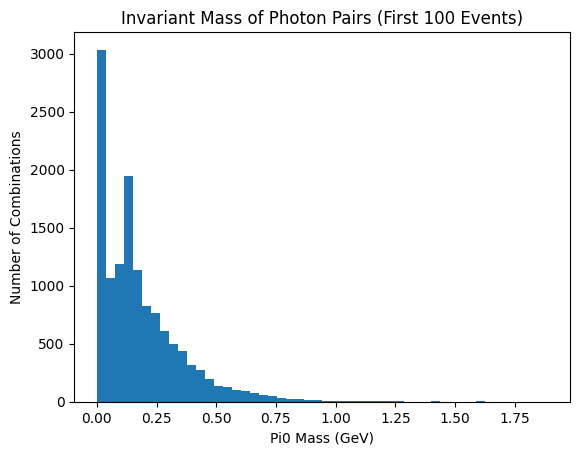

In [24]:


def get_pi0_mass(gE, gTheta, gPhi):
    # Convert to Cartesian coordinates
    px = gE * np.sin(gTheta) * np.cos(gPhi)
    py = gE * np.sin(gTheta) * np.sin(gPhi)
    pz = gE * np.cos(gTheta)
    E = gE
    return px, py, pz, E

pi0_masses = []
events = df['event'].unique()

for event_num in events:
    event_photons = df[df['event'] == event_num]
    if len(event_photons) >= 2:
        for photon1, photon2 in itertools.combinations(event_photons.index, 2):
            gE1, gTheta1, gPhi1 = event_photons.loc[photon1, ['gE', 'gTheta', 'gPhi']]
            gE2, gTheta2, gPhi2 = event_photons.loc[photon2, ['gE', 'gTheta', 'gPhi']]

            px1, py1, pz1, E1 = get_pi0_mass(gE1, gTheta1, gPhi1)
            px2, py2, pz2, E2 = get_pi0_mass(gE2, gTheta2, gPhi2)

            total_px = px1 + px2
            total_py = py1 + py2
            total_pz = pz1 + pz2
            total_E = E1 + E2

            pi0_mass = np.sqrt(total_E**2 - (total_px**2 + total_py**2 + total_pz**2))
            pi0_masses.append(pi0_mass)

plt.hist(pi0_masses, bins=50)
plt.xlabel("Pi0 Mass (GeV)")
plt.ylabel("Number of Combinations")
plt.title("Invariant Mass of Photon Pairs")
plt.show()
